- 코랩에서 matplotlib 이용할때 한글 깨짐 현상 해결방법
    - 아래의 셀을 실행 후 런타임을 다시시작 해야 반영된다.

In [4]:
import matplotlib as plt
plt.rc('axes', unicode_minus=False) # 마이너스 기호 깨짐 방지

# 한글 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

plt.rc('font', family='Malgun Gothic') # 폰트 적용

'sudo'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.
'sudo'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.
'rm'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


- 와인 품질 분류 데이터셋
    - 와인 정보를 바탕으로 품질을 분류하는 다중 분류 문제(Multi-Class)
    - 품질 컬럼이 타겟인데 0~5 등급으로 레이블 인코딩 되어 있고 높을수록 품질이 좋음
    - 평가 지표 Accuracy

- 구글 드라이브 연결

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# DATA_PATH = "/content/drive/MyDrive/data/"

In [5]:
import numpy as np
import pandas as pd
import os 

DATA_PATH=os.getcwd()

train = pd.read_csv(f"{DATA_PATH}\\data\\winequality_train.csv")
test = pd.read_csv(f"{DATA_PATH}\\data\\winequality_test.csv")
train.shape, test.shape

((5197, 13), (1300, 12))

In [6]:
train.head()

,산도,휘발성산,시트르산,잔당,염화물,독립이산화황,총이산화황,밀도,수소이온농도,황산염,도수,종류,품질
0,6.8,0.30,0.27,11.6,0.028,22.0,97.0,0.99314,2.96,0.38,11.7,white,3
1,7.2,0.50,0.00,0.8,0.034,46.0,114.0,0.99320,3.19,0.34,9.2,white,1
2,6.6,0.54,0.21,16.3,0.055,41.0,182.0,0.99860,3.35,0.54,10.4,white,3
3,7.5,0.29,0.67,8.1,0.037,53.0,166.0,0.99660,2.90,0.41,8.9,white,3
4,6.5,0.17,0.33,1.4,0.028,14.0,99.0,0.99280,3.23,0.55,10.1,white,3


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5197 entries, 0 to 5196
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   산도      5197 non-null   float64
 1   휘발성산    5197 non-null   float64
 2   시트르산    5197 non-null   float64
 3   잔당      5197 non-null   float64
 4   염화물     5197 non-null   float64
 5   독립이산화황  5197 non-null   float64
 6   총이산화황   5197 non-null   float64
 7   밀도      5197 non-null   float64
 8   수소이온농도  5197 non-null   float64
 9   황산염     5197 non-null   float64
 10  도수      5197 non-null   float64
 11  종류      5197 non-null   object 
 12  품질      5197 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 527.9+ KB


- 결측치 확인하기

In [8]:
train.isnull().sum().sum(), test.isnull().sum().sum()

(0, 0)

In [9]:
train_ft = train.iloc[:,:-1].copy()

In [10]:
test_ft = test.copy()

train_ft.shape, test_ft.shape

((5197, 12), (1300, 12))

In [11]:
train_ft["종류"].unique()

array(['white', 'red'], dtype=object)

- 종류 피처 0 과 1로 인코딩!

In [12]:
type_dict = {
    'white' : 0,
    'red' : 1
}

train_ft["종류"] = train_ft["종류"].map(type_dict)
test_ft["종류"] = test_ft["종류"].map(type_dict)

In [13]:
# train_ft에 적용
train_ft["종류"] = train_ft["종류"].apply(lambda x: type_dict[x])

# test_ft에 적용
test_ft["종류"] = test_ft["종류"].apply(lambda x: type_dict[x])


KeyError: 0

- min-max scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train_ft)

MinMaxScaler()

In [ ]:
train_ft[train_ft.columns] = scaler.transform(train_ft)
test_ft[test_ft.columns] = scaler.transform(test_ft)

- 정답데이터

In [14]:
target = train["품질"]
target

0       3
1       1
2       3
3       3
4       3
       ..
5192    2
5193    2
5194    3
5195    3
5196    2
Name: 품질, Length: 5197, dtype: int64

In [15]:
target.value_counts(True)

품질
3    0.436598
2    0.329036
4    0.166057
1    0.033288
5    0.030402
0    0.004618
Name: proportion, dtype: float64

# 앙상블 학습(Ensemble Learning)
- 기계학습에서 여러개의 개별모델의 예측을 결합함으로써 보다 정확한 예측을 도출하는 기법
- 앙상블 학습의 유형
    - 보팅(Voting), 스태킹(Stacking), 배깅(Bagging), 부스팅(Boosting)

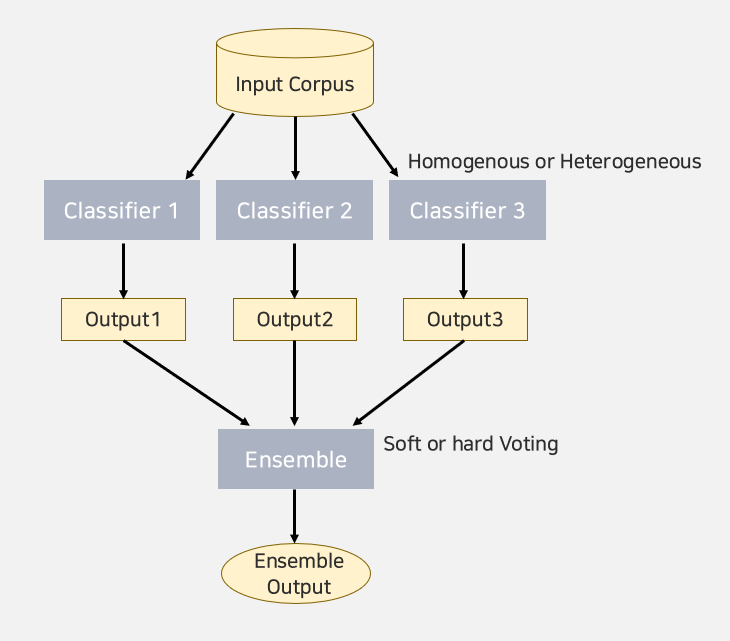

# 앙상블 효과
- 오버피팅 감소 효과로 인해 예측 성능 향상
- 개별 모델로 성능을 낼 수 없을 때 앙상블 기법을 사용하면 예측 성능 향상





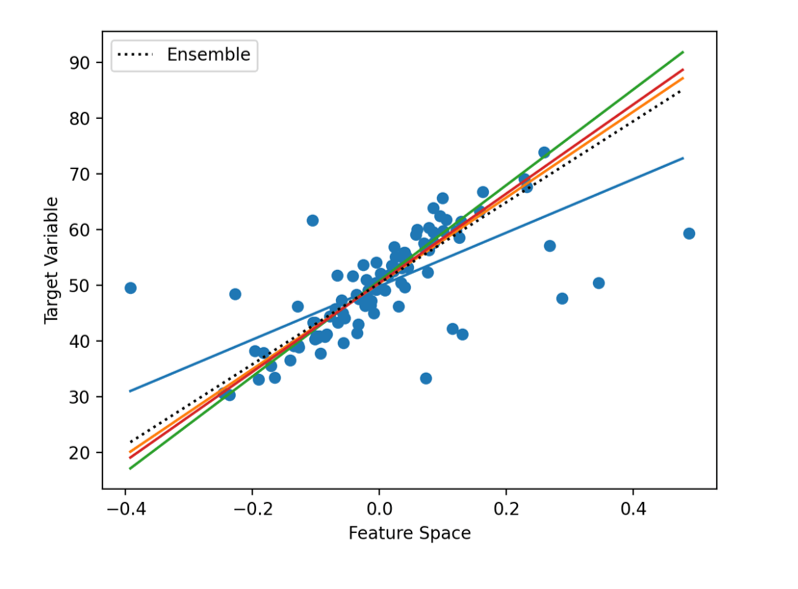

# Voting
- 여러 모델들의 예측값을 투표방식(hard) or 평균방식(soft) 으로 앙상블
- 분류, 회귀 모두 사용가능
- 하드 보팅(Hard Voting)
    - 예측 결과의 최빈값
    - 예측 결과를 투표하는 방식(다수결 원칙)
- 소프트 보팅(Soft Voting)
    - 각 클래스의 예측 확률을 평균 내는 방식
(가장 높은 확률 선택)



    

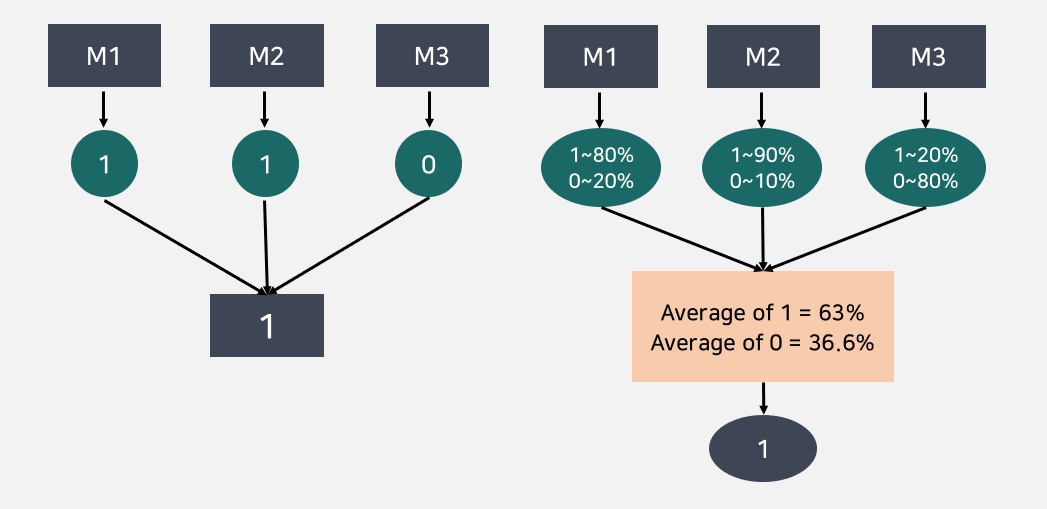

In [16]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

- VotingClassifier 주요 파라미터
    - estimators
        - 별칭과 모델 객체를 리스트에 담아 전달하면 된다.
    - voting
        - 'hard'(default) , 'soft'

In [18]:
from sklearn.ensemble import VotingClassifier

estimators = [
    ("lr", LogisticRegression(random_state=42) ),
    ("knn", KNeighborsClassifier() ),
    ("dt", DecisionTreeClassifier(random_state=42) )
]

model = VotingClassifier(estimators, voting="soft", n_jobs=-1)

scores = cross_val_score(model, train_ft, target, cv=cv, scoring="accuracy", n_jobs=-1)
scores.mean()

0.5859169319612053

In [19]:
model.fit(train_ft, target)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('knn', KNeighborsClassifier()),
                             ('dt', DecisionTreeClassifier(random_state=42))],
                 n_jobs=-1, voting='soft')

- hard 방식은 predict_proba 사용 불가!

In [20]:
model.predict_proba(test_ft)

array([[7.01679805e-04, 9.13288135e-03, 1.93278008e-01, 7.38321139e-01,
        4.83695917e-02, 1.01967004e-02],
       [1.25480485e-03, 2.09570865e-03, 6.02202212e-01, 3.65900679e-01,
        2.25539950e-02, 5.99260017e-03],
       [6.42709180e-04, 8.92455720e-02, 7.69452581e-01, 1.03254229e-01,
        3.11072570e-02, 6.29765196e-03],
       ...,
       [4.86052176e-04, 2.78017503e-02, 3.01153739e-01, 2.29452753e-01,
        4.32489056e-01, 8.61664942e-03],
       [9.35254596e-04, 1.21851106e-02, 2.54739665e-01, 6.34113429e-01,
        9.33655376e-02, 4.66100280e-03],
       [1.71316097e-03, 1.70475277e-02, 3.95225019e-01, 5.28763508e-01,
        4.84122402e-02, 8.83854395e-03]])

# Stacking
- 여러 모델들의 예측 결과를 학습 데이터로 만들어서 다시 별도의 최종 모델(메타 모델)로 재 학습시켜 예측하는 방식​
- Stacking Ensemble은 학습된 모델들의 예측 결과를 Features로 사용하여 메타 모델이 다시 학습시키는 방식
- 과적합 방지를 위해 내부적으로 각모델별로 CV 를 진행한다.
- 분류, 회귀 모두 사용가능


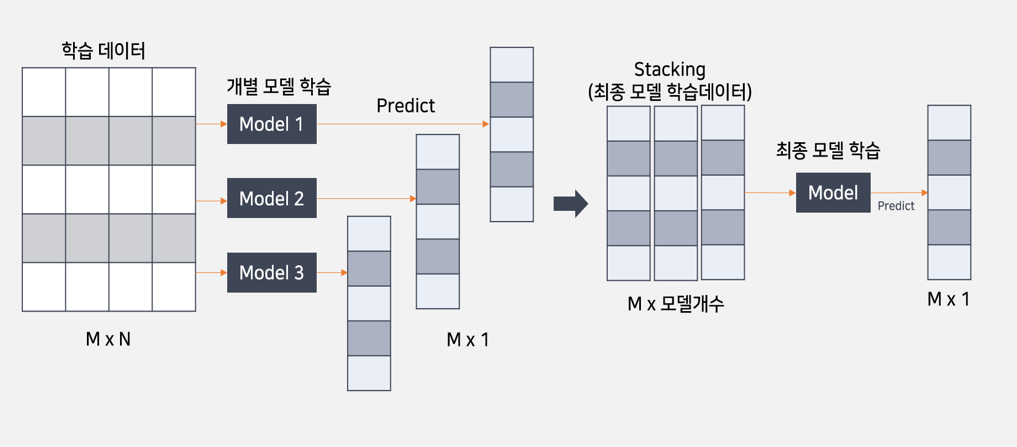

## 교차 검증 기반의 스태킹 과정
- Stacking Ensemble의 학습데이터에 과적합 되는 문제 개선
- 개별 모델들의 교차 검증을 통해 나온 검증 세트에 예측 값을 최종 모델에서 학습데이터로 사용
    1. 개별 모델 학습 단계에서 학습 데이터를 K-Fold로 분리
    2. 다음의 과정을 K번 반복
        - 한 개의 Fold를 검증 세트로 함
        - 검증 세트의 예측값을 최종 모델의 학습데이터로 함





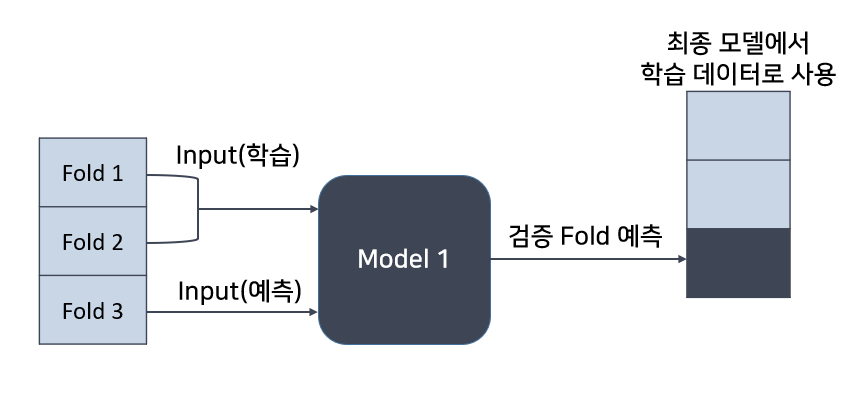

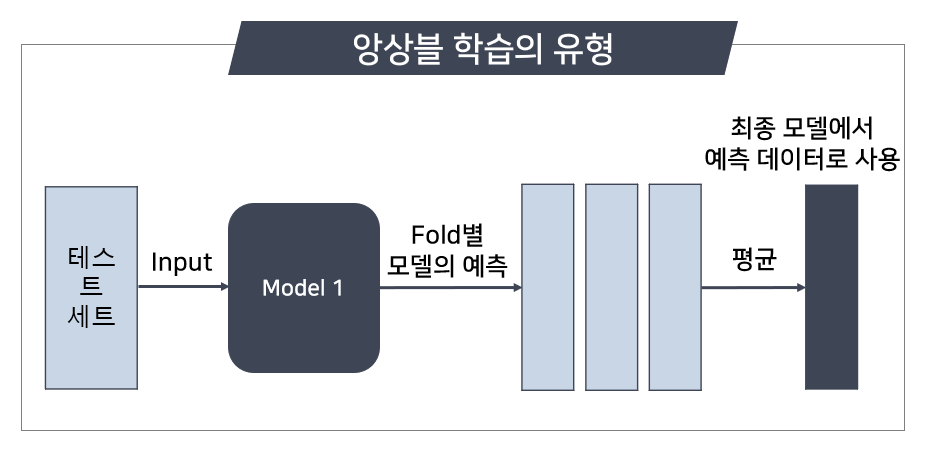

- StackingClassifier 주요 파라미터
    - estimators
        - 별칭과 함께 모델 객체를 리스트에 담아 전달하면 된다.
    - final_estimator
        - 메타 모델 객체 전달
    - cv
        - 정수(fold 수) 혹은 cv 객체 전달

In [22]:
from sklearn.ensemble import StackingClassifier
params = {
    "estimators" : estimators,
    "final_estimator": LogisticRegression(random_state=42, max_iter=500),
    "cv": cv,
    "n_jobs" : -1
}
model = StackingClassifier(**params)
scores = cross_val_score(model, train_ft, target, cv=cv, scoring="accuracy", n_jobs=-1)
scores.mean()

0.6186255275042571

In [23]:
model.fit(train_ft, target)

StackingClassifier(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimators=[('lr', LogisticRegression(random_state=42)),
                               ('knn', KNeighborsClassifier()),
                               ('dt', DecisionTreeClassifier(random_state=42))],
                   final_estimator=LogisticRegression(max_iter=500,
                                                      random_state=42),
                   n_jobs=-1)

# Bagging
- Bootstrap aggregating의 약자로 Bootstrap sampling 기법을 이용해 학습데이터를 여러 번 뽑아 각 모델에 학습시켜 예측 결과의 최빈값 또는 평균으로 예측하는 방식
- Bootstrap sampling
    - 크기가 n인 학습데이터가 주어졌을 때 하나의 샘플이 나올 확률은 1/n 으로 하고 랜덤하게 샘플들을 뽑아 새로운 학습데이터를 여러 개 만드는 기법으로 한 번 뽑힌 샘플을 복원하여 다시 뽑는 복원 추출법이 사용
    - 복원 추출법이 사용되는 이유는 같은 샘플이 중복해서 나오는 것을 허용하지 않을 경우 순서만 바꾸는 학습데이터이기 때문
- 분류, 회귀 모두 사용가능


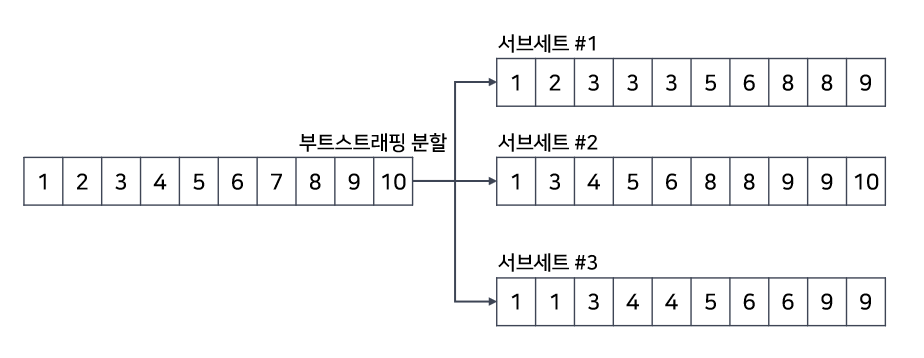

- BaggingClassifier 주요 파라미터
    - random_state
        - 시드값
    - estimator
        - 모델 객체를 전달하면 된다.
        - 기본값은 None이며 tree 모델이 선택된다.
    - n_estimators
        - base 모델 개수(Bootstrap sampling 수)
        - 기본값은 10
    - max_samples
        - 각 모델이 학습시 사용할 샘플 개수
        - int(개수) or float(비율) 형으로 주면 된다. 기본값 1.0
    - max_features
        - 각 모델이 학습시 사용할 피쳐 개수
        - int(개수) or float(비율) 형으로 주면 된다. 기본값 1.0
    - bootstrap_features
        - 각 모델별로 피쳐를 다르게 할지 여부
        - bool 자료형을 넣으면 되고 기본값은 False

In [21]:
from sklearn.ensemble import BaggingClassifier

params = {
    "random_state" : 42,
    "estimator" : LogisticRegression(random_state=42),
    "n_estimators" : 10,
    "n_jobs" : -1
}

model = BaggingClassifier(**params)
scores = cross_val_score(model, train_ft, target, cv=cv, n_jobs=-1, scoring = "accuracy")
scores.mean()

0.4848932035240986

# Random Forest
- 다수의 결정 트리 모델이 학습데이터에서 **배깅 방식**으로 각자의 데이터를 샘플링해 개별적으로 학습을 수행한 뒤 앙상블 하는 모델
- 분류, 회귀 모두 사용가능


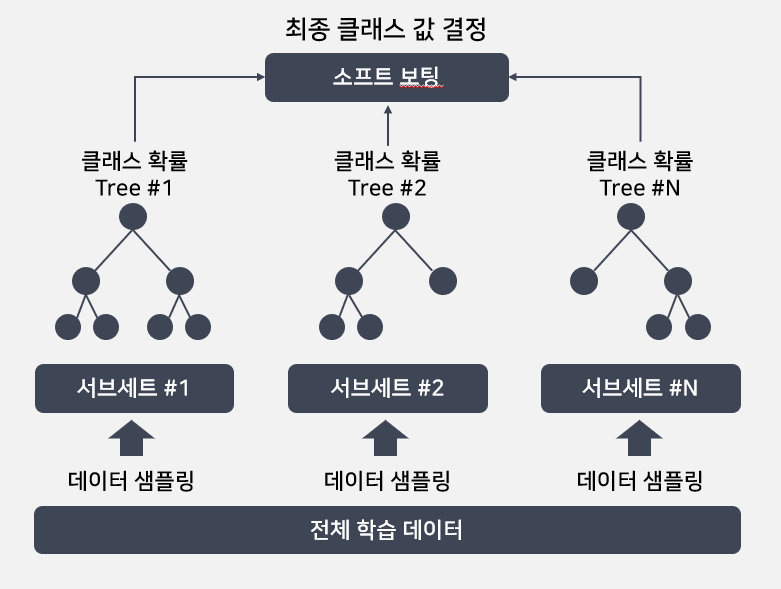

- RandomForestClassifier 주요 파라미터
    - random_state
        - 시드값
    - n_estimators
        - tree 모델 개수(Bootstrap sampling 수)
        - 기본값은 100
    - max_samples
        - 각 트리모델이 학습시 사용할 샘플 개수
        - int(개수) or float(비율) 형으로 주면 된다. 기본값 None(전체샘플수)
    - 트리모델에 있는 하이퍼파라미터를 그대로 사용가능하다.
        - min_samples_split , max_depth , min_samples_split , max_features, max_leaf_nodes

In [22]:
from sklearn.ensemble import RandomForestClassifier

params = {
    "random_state": 42,
    "n_estimators" : 80,
    "min_samples_split": 4,
    "n_jobs" : -1
}
model = RandomForestClassifier(**params)
scores = cross_val_score(model, train_ft, target, cv=cv, n_jobs=-1, scoring = "accuracy")
scores.mean()

0.6684576515880654

In [23]:
model.fit(train_ft, target)

RandomForestClassifier(min_samples_split=4, n_estimators=80, n_jobs=-1,
                       random_state=42)

In [24]:
model.feature_importances_

array([0.07420134, 0.10090082, 0.07816392, 0.08535679, 0.0848398 ,
       0.08559522, 0.08884046, 0.1030479 , 0.08091284, 0.0847947 ,
       0.12978517, 0.00356103])

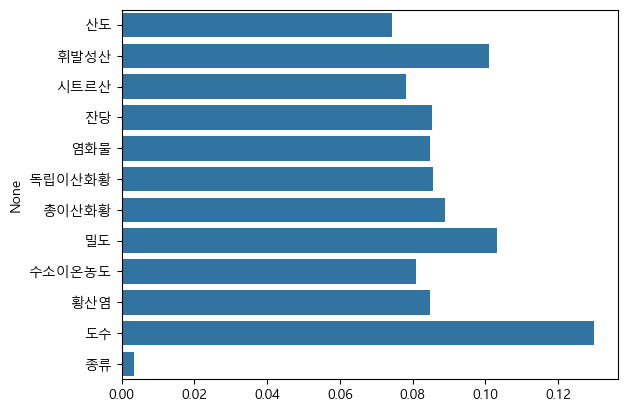

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x=model.feature_importances_ , y= train_ft.columns)
plt.show()

# Gradient Boosting
- 트리 기반의 Boosting 계열의 앙상블 모델
- 부스팅(Boosting)
    - 여러 개의 약한 학습기를 순차적으로 학습하면서 약한 학습기들을 결합하여 강한 분류기를 만드는 과정
    - 배깅과 다른 점은 순차적으로 학습기를 생성
- Gradient boosting 외의 Boosting 계열의 알고리즘으로 Adaptive boosting이 있음
- 정형 데이터에 대한 예측에서 엄청난 성능을 보여주고 머신러닝 알고리즘 중에서도 가장 예측 성능이 높다고 알려진 알고리즘
- Gradient Boosting 알고리즘을 기반으로 XGBoost, LightGBM, CatBoost 등과 같은 개선된 모델이 있음
- 분류, 회귀 모두 사용가능
- 데이터가 적으면 과적합이 발생한다.


## Gradient Boosting 학습 원리
- 이전 학습기에서 발생한 잔여 오차(Residual Error)를 y값으로 하여 새로운 학습기로 학습을 시키는 방식
- 순차적으로 반복하다 보면 잔여 오차는 0에 가까워 짐
- 최종적으로 모든 학습기를 결합하여 예측




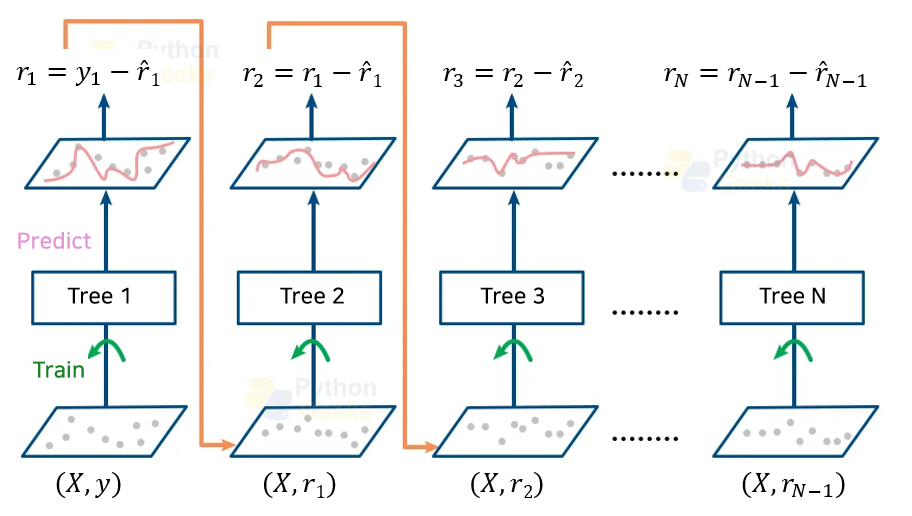

- GradientBoostingClassifier 주요 파라미터
    - random_state
        - 시드값
    - n_estimators
        - 부스팅 단계수
        - 기본값은 100
    - learning_rate
        - 학습률로 부스팅 과정에서 각 트리의 기여도
        - 기본값은 0.1로 0~1 사이의 값을 넣어야함
    - 트리모델에 있는 하이퍼파라미터를 그대로 사용가능하다.
        - min_samples_split , max_depth , min_samples_split , max_features, max_leaf_nodes

In [26]:
from sklearn.ensemble import GradientBoostingClassifier

params = {
    "random_state" : 42,
    "n_estimators" : 200,
    "learning_rate" : 0.5
}
model = GradientBoostingClassifier(**params)
scores = cross_val_score(model, train_ft, target, cv=cv, n_jobs=-1, scoring = "accuracy")
scores.mean()

0.6193923521137188

#### 회귀 문제 데이터셋을 이용하여 Gradient Boosting 이해해보기

In [27]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_diabetes

In [28]:
train_data = load_diabetes()["data"]
target_data = load_diabetes()["target"]
train_data.shape , target_data.shape

((442, 10), (442,))

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(train_data, target_data, random_state=42)
x_train.shape, x_valid.shape, y_train.shape, y_valid.shape

((331, 10), (111, 10), (331,), (111,))

In [30]:
# 각 트리 모델의 하이퍼 파라미터
hp = {
    "max_depth" : 2,
    "random_state": 42
}

- 1단계: 실제값을 타겟으로 하여 학습

In [31]:
tree1 = DecisionTreeRegressor(**hp)
tree1.fit(x_train, y_train)
pred = tree1.predict(x_train)
residual = y_train - pred # 실제값과 예측값의 차이(잔여 오차)

- 2단계: 이전 단계의 잔여 오차를 타겟으로 하여 학습

In [32]:
tree2 = DecisionTreeRegressor(**hp)
tree2.fit(x_train, residual)
pred = tree2.predict(x_train)
residual = residual - pred

- 3단계: 이전 단계의 잔여 오차를 타겟으로 하여 학습

In [33]:
tree3 = DecisionTreeRegressor(**hp)
tree3.fit(x_train, residual)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [34]:
pred = tree1.predict(x_valid) + tree2.predict(x_valid) + tree3.predict(x_valid)
mean_squared_error(y_valid, pred) ** 0.5

61.03724125099467

In [62]:
hp

{'max_depth': 2, 'random_state': 42}

In [64]:
gbr = GradientBoostingRegressor(**hp, n_estimators=3, learning_rate=1)
gbr.fit(x_train,y_train)
pred = gbr.predict(x_valid)
mean_squared_error(y_valid, pred) ** 0.5

61.03724125099466

## XGBoost(eXtra Gradient Boost)
- GBM의 느린 수행시간을 개선하고 과적합 규제 등 다양한 기능이 지원되는 GBM 기반 라이브러리
- 머신러닝 과제에서 뛰어난 예측 성능을 보임
- tree 기반의 앙상블 학습에서 각광받는 알고리즘
- 분류, 회귀 모두 사용가능
- XGBoost는 사이킷런과 연동되는 모듈을 지원한다.
- https://xgboost.readthedocs.io/en/stable/
- 설치 방법
```python
pip install xgboost
```
- XGBClassifier 주요 파라미터
    - random_state
        - 시드값
    - n_estimators
        - 부스팅 단계수, 기본값은 100
    - learning_rate
        - 학습률, 기본값은 0.1
    - objective
        - 손실함수 정의
        - 기본값 'binary:logistic'
        - https://github.com/dmlc/xgboost/blob/master/doc/parameter.rst
    - 그 외 다양한 파라미터가 있다. 다음 문서를 참고
        - https://xgboost.readthedocs.io/en/stable/parameter.html

In [28]:
!pip install xgboost

  Using cached xgboost-2.1.1-py3-none-win_amd64.whl.metadata (2.1 kB)
Using cached xgboost-2.1.1-py3-none-win_amd64.whl (124.9 MB)


In [70]:
from xgboost import XGBClassifier
params = {
    "random_state": 42,
    "n_estimators": 300,
    "learning_rate": 0.1,
    "objective": "multi:softmax",
    "n_jobs" : -1
}

model = XGBClassifier(**params)
scores = cross_val_score(model, train_ft, target, cv=cv, n_jobs=-1, scoring = "accuracy")
scores.mean()

0.6501813874287408

In [71]:
model.fit(train_ft, target)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=-1,
              num_parallel_tree=None, objective='multi:softmax', ...)

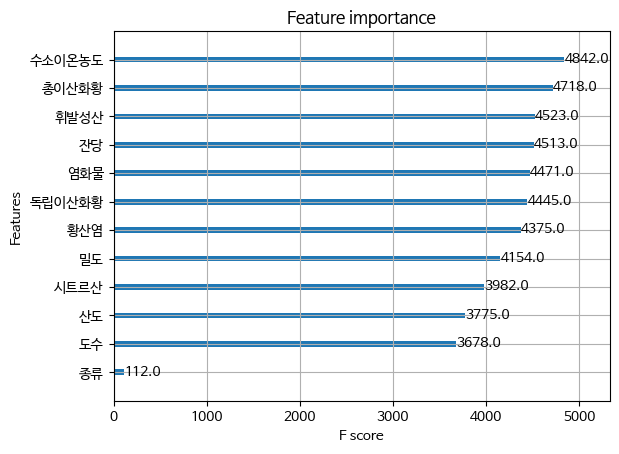

In [73]:
from xgboost import plot_importance
plot_importance(model)
plt.show()

## LightGBM
- 대용량 데이터 처리에 적합하며 XGBoost와 마찬가지로 병렬처리 및 GPU를 지원
- 다른 GBM 계열의 알고리즘보다 메모리를 적게 사용하고 학습속도가 빠름
- 하지만 데이터 수가 너무 적을 때는 과적합 문제를 일으키기도 한다.
- XGBoost 보다 학습에 걸리는 시간이 적음
- 일반적인 트리 계열 알고리즘과 다르게 LightGBM은 리프 중심 트리 분할을 사용


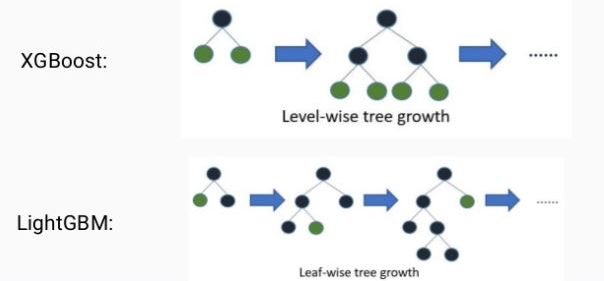

- 분류, 회귀 모두 사용가능
- https://lightgbm.readthedocs.io/en/latest/index.html
- 설치 방법
```python
pip install lightgbm
```
- LGBMClassifier 주요 파라미터
    - random_state
        - 시드값
    - n_estimators
        - 부스팅 단계수, 기본값은 100
    - learning_rate
        - 학습률, 기본값은 0.1
    - objective
        - 손실함수 정의
        - 이진분류는 'binary' , 다중분류는 'multiclass'
        - https://lightgbm.readthedocs.io/en/latest/Parameters.html#core-parameters
    - 그 외 다양한 파라미터가 있다. 다음 문서를 참고
        - https://lightgbm.readthedocs.io/en/latest/Parameters.html

        

In [ ]:
!pip install lighgbm

In [75]:
from lightgbm import LGBMClassifier

params = {
    "random_state": 42,
    "n_estimators": 300,
    "learning_rate": 0.1,
    "objective": "multiclass",
    "n_jobs": -1
}

model = LGBMClassifier(**params)
scores = cross_val_score(model, train_ft, target, cv=cv, n_jobs=-1, scoring = "accuracy")
scores.mean()

0.6515303176130895

In [78]:
from lightgbm import plot_importance
model.fit(train_ft, target)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.102008 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1533
[LightGBM] [Info] Number of data points in the train set: 5197, number of used features: 12
[LightGBM] [Info] Start training from score -5.377783
[LightGBM] [Info] Start training from score -3.402545
[LightGBM] [Info] Start training from score -1.111588
[LightGBM] [Info] Start training from score -0.828742
[LightGBM] [Info] Start training from score -1.795422
[LightGBM] [Info] Start training from score -3.493242
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [W

LGBMClassifier(n_estimators=300, n_jobs=-1, objective='multiclass',
               random_state=42)

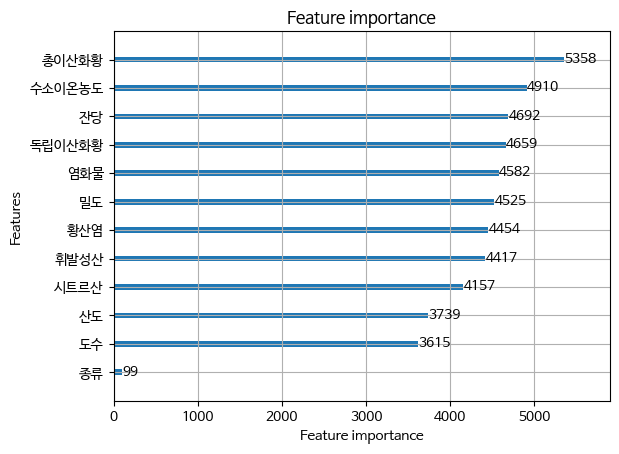

In [79]:
plot_importance(model)
plt.show()

## catboost
- 범주형 변수에 강력한 성능을 보여주는 부스팅 모델
- 범주형 변수가 많을경우 높은 성능과 함께 학습 속도가  개선된다.
- 수치형 변수가 대부분일 때는 매우 느리다.
- 범주형 변수를 인코딩 하지 않고 넣어도 된다.
    - 내부적으로 Ordered Target Encoding, One-hot Encoding 방식으로 범주형 변수를 인코딩
    - Target Encoding은 해당 범주를 타겟값의 평균으로 인코딩하는 방법
    

- Target Encoding 예시(data leakage 문제)

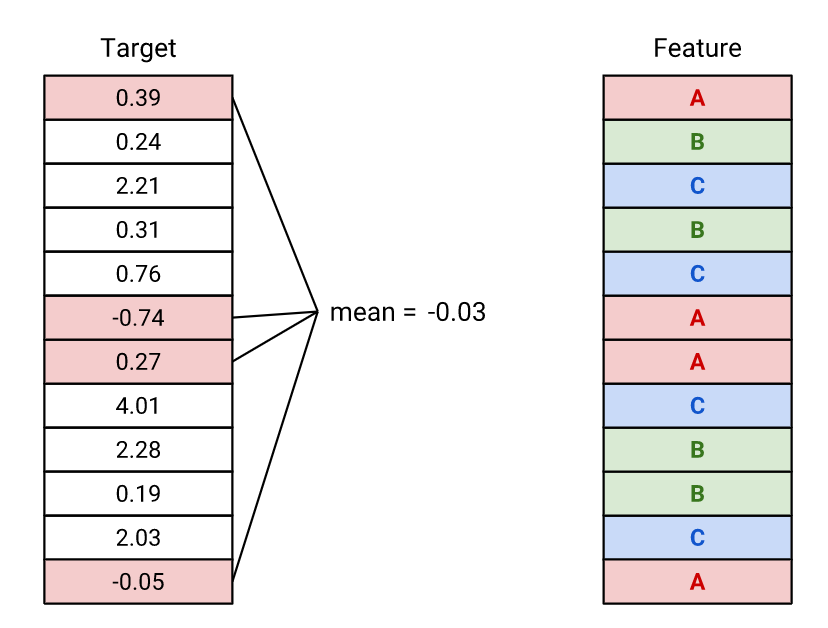

- https://catboost.ai/en/docs/
- 설치 방법
```python
pip install catboost
```
- CatBoostClassifier 주요 파라미터
    - random_state
        - 시드값
    - iterations
        - 부스팅 단계수, 기본값은 100
    - loss_function
        - 손실함수 정의
        - https://catboost.ai/en/docs/concepts/loss-functions
    - cat_features
        - 범주형 컬럼들을 리스트에 담아 넣는다.
    - one_hot_max_size
        - 범주형 변수의 고유값이 이 파라미터수 이하이면 원핫 인코딩을 한다.
    
        

In [80]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 4.8 MB/s eta 0:00:00


In [86]:
from catboost import CatBoostClassifier

params = {
    "random_state": 42,
    "iterations": 300,
    "loss_function" : "MultiClass",
    # "cat_features" : ["종류"]
}
model = CatBoostClassifier(**params)
scores = cross_val_score(model, train_ft, target, cv=cv, n_jobs=-1, scoring = "accuracy")
scores.mean()

0.6317055970978012

In [83]:
model.fit(train_ft, target)

Learning rate set to 0.238045
0:	learn: 1.5304788	total: 61.5ms	remaining: 18.4s
1:	learn: 1.3854959	total: 117ms	remaining: 17.5s
2:	learn: 1.2944857	total: 160ms	remaining: 15.8s
3:	learn: 1.2222417	total: 185ms	remaining: 13.7s
4:	learn: 1.1725015	total: 256ms	remaining: 15.1s
5:	learn: 1.1415428	total: 291ms	remaining: 14.3s
6:	learn: 1.1144289	total: 338ms	remaining: 14.2s
7:	learn: 1.0929050	total: 381ms	remaining: 13.9s
8:	learn: 1.0749335	total: 414ms	remaining: 13.4s
9:	learn: 1.0589324	total: 455ms	remaining: 13.2s
10:	learn: 1.0480735	total: 490ms	remaining: 12.9s
11:	learn: 1.0358313	total: 554ms	remaining: 13.3s
12:	learn: 1.0258213	total: 610ms	remaining: 13.5s
13:	learn: 1.0176596	total: 650ms	remaining: 13.3s
14:	learn: 1.0100977	total: 683ms	remaining: 13s
15:	learn: 1.0028711	total: 723ms	remaining: 12.8s
16:	learn: 0.9960909	total: 775ms	remaining: 12.9s
17:	learn: 0.9895708	total: 827ms	remaining: 13s
18:	learn: 0.9828385	total: 889ms	remaining: 13.2s
19:	learn: 0.9

In [84]:
model.feature_importances_

array([ 7.70505846, 10.29729168,  9.14621291,  7.44200207,  7.53957168,
        9.15944915,  7.78661437,  7.11092053,  9.83296076,  9.04428503,
       13.84333261,  1.09230075])